In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import re
%matplotlib inline

In [6]:
df = pd.read_csv('chefkoch.csv', names = ['Zutaten', 'Bewertung', 'Gericht', 'Bewertungen_Counter', 'URL'])
#df

In [7]:
df.dtypes

Zutaten                object
Bewertung              object
Gericht                object
Bewertungen_Counter    object
URL                    object
dtype: object

In [8]:
def clean_columns(row):
    if row['URL'] is np.nan:
        #print(row['Bewertung'])
        row['URL'] = row['Bewertungen_Counter']
        row['Bewertungen_Counter'] = 0
        row['Gericht'] = row['Bewertung']
        row['Bewertung'] = np.nan
    return row

In [9]:
df.apply(clean_columns, axis = 1)
df = df.drop_duplicates(subset = 'URL')
#df

In [10]:
df.Bewertungen_Counter = df.Bewertungen_Counter.str.replace('(', '')
df.Bewertungen_Counter = df.Bewertungen_Counter.str.replace(')', '').astype(float)
df.Bewertung = df.Bewertung.str.replace(',','.')
df.Bewertung = df.Bewertung.astype(float)

In [11]:
#df.sort_values('Bewertung', ascending = False)

In [12]:
df.dtypes

Zutaten                 object
Bewertung              float64
Gericht                 object
Bewertungen_Counter    float64
URL                     object
dtype: object

In [13]:
df.Zutaten.str.extract(r'(Ei)').count().tolist()[0]

43036

In [10]:
def quickcheck_ingredients(list_):    
    return_list=[]
    for ing in list_:
        temp_dict={}
        regx = "\'("+ing+")\'"
        #regx = "'"+ing+"'"
        print(regx)
        hits = df.Zutaten.str.extract(regx).count().tolist()[0]
        print(hits)
        #print(df.Zutaten.str.extract(regx))
        temp_dict['Treffer'] = hits
        temp_dict['Zutat'] = ing
        return_list.append(temp_dict)
    return return_list

In [11]:
df_temp = pd.DataFrame(quickcheck_ingredients(['Milch', 'Ei', 'Zucker', 'Salz', 'Butter']))

'(Milch)'
8693
'(Ei)'
0
'(Zucker)'
21242
'(Salz)'
21517
'(Butter)'
13075


In [14]:
def get_Zutaten(row):
    diese_zutaten = []
    for zutat in eval(row['Zutaten']):
        for z in zutat:
            clean_z = z.split('(')[0]
            clean_z = clean_z.split(',')[0]
            clean_z = clean_z.strip()
            my_predefined_set = ['Schokolade', 'Knoblauch', 'Ingwer', 'Salz', 'Pfeffer']
            for item in my_predefined_set:
                if item.lower() in clean_z.lower():
                    clean_z = item                   
            if 'Für d' not in clean_z:
                if ':' not in clean_z:
                    if ' oder' in clean_z:
                        or_split = clean_z.split(' oder')
                        for n in or_split:
                            diese_zutaten.append(n.strip())
                    if 'und/oder' in clean_z:
                        or_split = clean_z.split(' und/oder')
                        for n in or_split:
                                diese_zutaten.append(n.strip())
                    if ' zum ' in clean_z:
                        zum_split = clean_z.split('zum')[0]
                        diese_zutaten.append(zum_split.strip())
                    if ' für ' in clean_z:
                        zum_split = clean_z.split('für')[0]
                        diese_zutaten.append(zum_split.strip())
                    diese_zutaten.append(clean_z)
                else:
                    if clean_z.split(':')[0] not in [123456789]:
                        diese_zutaten.append(clean_z.split(':')[0])
            diese_zutaten_clean = []
# added this for-loop later after I realized the initial results were crappy
            for zutat in diese_zutaten:
                zutat.replace(',', '')
                zutat = re.sub(r'ähnlich\w+?', '', zutat)
                zutat = re.sub(r'zum \w+', '', zutat)
                zutat.strip()
                diese_zutaten_clean.append(zutat)
            diese_zutaten_clean_filtered = filter(None, diese_zutaten_clean)
    return pd.Series([list(set(diese_zutaten_clean_filtered))])

In [15]:
df.head().apply(get_Zutaten, axis = 1)

,0
0,"[Mehl, Hefe, Wasser, Sauerteig, Weizenmehl, Salz]"
1,"[Kräuterbutter, Öl, Kartoffel, Pfeffer, Salz, ..."
2,"[Weißwein, Schweinelende, Öl, Saft, Granatapfe..."
3,"[Brot, Kartoffel, Schmelzkäse, Pfeffer, Gemüse..."
4,"[Olivenöl, Salat, Essig, Blüten, Löwenzahn, Pe..."


In [16]:
df['zutaten_clean'] = df.apply(get_Zutaten, axis = 1)

In [17]:
df.head()

,Zutaten,Bewertung,Gericht,Bewertungen_Counter,URL,zutaten_clean
0,"[{'Weizenmehl, 550': '500 g'}, {'Mehl, (Roggen...",4.65,Pain fendu von Ketex,60.0,https://www.chefkoch.de/rezepte/12505212301277...,"[Mehl, Hefe, Wasser, Sauerteig, Weizenmehl, Salz]"
1,"[{'Rumpsteak(s), à 180 g': '1'}, {'Zwiebel(n)'...",3.80,Rumpsteak mit Bratkartoffeln,3.0,https://www.chefkoch.de/rezepte/17511412845418...,"[Kräuterbutter, Öl, Kartoffel, Pfeffer, Salz, ..."
2,"[{'Schweinelende(n)': '600 g'}, {'Öl': '2 EL'}...",3.33,Schweinelende 'Granatapfel',1.0,https://www.chefkoch.de/rezepte/11054612166426...,"[Weißwein, Schweinelende, Öl, Saft, Granatapfe..."
3,"[{'Brokkoli, frisch (ersatzweise TK)': '1 kg'}...",3.00,Brokkolisuppe,1.0,https://www.chefkoch.de/rezepte/14996912555228...,"[Brot, Kartoffel, Schmelzkäse, Pfeffer, Gemüse..."
4,"[{'Rucola': '100 g'}, {'Löwenzahn, gelber und ...",3.00,Blumensalat,1.0,https://www.chefkoch.de/rezepte/98573120395040...,"[Olivenöl, Salat, Essig, Blüten, Löwenzahn, Pe..."


In [18]:
def get_length(row):
    return len(row['zutaten_clean'])

In [19]:
df['zutaten_anzahl'] = df.apply(get_length, axis = 1)

In [20]:
#del df['Zutaten']

In [21]:
df.head()

,Zutaten,Bewertung,Gericht,Bewertungen_Counter,URL,zutaten_clean,zutaten_anzahl
0,"[{'Weizenmehl, 550': '500 g'}, {'Mehl, (Roggen...",4.65,Pain fendu von Ketex,60.0,https://www.chefkoch.de/rezepte/12505212301277...,"[Mehl, Hefe, Wasser, Sauerteig, Weizenmehl, Salz]",6
1,"[{'Rumpsteak(s), à 180 g': '1'}, {'Zwiebel(n)'...",3.80,Rumpsteak mit Bratkartoffeln,3.0,https://www.chefkoch.de/rezepte/17511412845418...,"[Kräuterbutter, Öl, Kartoffel, Pfeffer, Salz, ...",8
2,"[{'Schweinelende(n)': '600 g'}, {'Öl': '2 EL'}...",3.33,Schweinelende 'Granatapfel',1.0,https://www.chefkoch.de/rezepte/11054612166426...,"[Weißwein, Schweinelende, Öl, Saft, Granatapfe...",6
3,"[{'Brokkoli, frisch (ersatzweise TK)': '1 kg'}...",3.00,Brokkolisuppe,1.0,https://www.chefkoch.de/rezepte/14996912555228...,"[Brot, Kartoffel, Schmelzkäse, Pfeffer, Gemüse...",7
4,"[{'Rucola': '100 g'}, {'Löwenzahn, gelber und ...",3.00,Blumensalat,1.0,https://www.chefkoch.de/rezepte/98573120395040...,"[Olivenöl, Salat, Essig, Blüten, Löwenzahn, Pe...",10


In [22]:
df.sort_values('zutaten_clean', ascending = True)

,Zutaten,Bewertung,Gericht,Bewertungen_Counter,URL,zutaten_clean,zutaten_anzahl
57865,"[{'Bohnen, grüne, geputzt': '300 g'}, {'Salzwa...",3.33,Grüne Bohnen mit braunem Zucker und weißem Bal...,4.0,https://www.chefkoch.de/rezepte/23646113755209...,"[-blättchen, Speck, Mandelstifte oder -blättch...",10
160978,"[{'Hähnchenschenkel': '1100 g'}, {'Süßkartoffe...",3.33,Afrikanischer Hähnchen-Erdnusseintopf,1.0,https://www.chefkoch.de/rezepte/34639315160179...,"[-brühe, Öl, Tomaten, Hühnerfond, Erdnussbutte...",17
38772,"[{'Sonnenblumenkerne': '80 g'}, {'Kürbiskerne'...",4.05,Low Carb Granola-Müsli,17.0,https://www.chefkoch.de/rezepte/25824514051697...,"[-chips, Kokosraspel, Sonnenblumenkerne, Walnü...",11
152222,"[{'Schweineschnitzel oder -filetstücke': '4'},...",3.33,Karlsbader Sahnegeschnetzeltes,4.0,https://www.chefkoch.de/rezepte/29952214523551...,"[-filetstücke, Mehl, Margarine, Tomatenmark, B...",16
21737,"[{'Beeren, gemischt, frische (alternativ TK)':...",3.50,Rote Grütze selbermachen,4.0,https://www.chefkoch.de/rezepte/30213414549466...,"[-nektar, Beeren, Speisestärke, Kirschsaft ode...",6
121244,"[{'Hähnchenbrust oder -schenkel, ohne Haut': '...",3.25,General Tsos Hühnchen,2.0,https://www.chefkoch.de/rezepte/32630714851197...,"[-schenkel, Sambal Oelek, Knoblauch, Salz, Bro...",22
97979,"[{'Mehl': '125 g'}, {'Hefe oder 1 Beutel Trock...",3.80,Brioche - das Original und einige Variationen,3.0,https://www.chefkoch.de/rezepte/14118112460305...,"[1 Beutel Trockenhefe, Aroma, Sahne , Mehl für...",28
102147,[{'Kabeljaufilet(s) oder Rotbarschfilet': '2'}...,4.00,Fischstäbchen selbst gemacht,8.0,https://www.chefkoch.de/rezepte/30879111137065...,"[1 Brötchen vom Vortag, Mehl, Paniermehl oder ...",10
15590,"[{'Brötchen vom Vortag (ca. 350 g)': '7'}, {'M...",3.50,Brathähnchen im Semmelknödel - Bett,4.0,https://www.chefkoch.de/rezepte/17563412853288...,"[1 Bund, Speck, Butter, Majoran, Öl, Hähncheng...",18
25409,"[{'Reis': '300 g'}, {'Salzwasser': ''}, {'Hack...",3.00,Hackfleisch - Lauch - Soße mit Reis,1.0,https://www.chefkoch.de/rezepte/14642912513801...,"[1 Bund Lauchzwiebeln, Lauch oder 1 Bund Lauch...",12


In [23]:
df.to_csv('chefkoch_cleaned.csv', index = False)

In [24]:
long_list=[]
def get_list(row):
    for zutat in row['zutaten_clean']:
        long_list.append(zutat)


In [25]:
df.apply(get_list, axis = 1)

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
176586    None
176589    None
176590    None
176591    None
176592    None
176595    None
176596    None
176597    None
176599    None
176601    None
176602    None
176605    None
176606    None
176610    None
176611    None
176612    None
176613    None
176615    None
176624    None
176628    None
176630    None
176636    None
176644    None
176648    None
176649    None
176651    None
176653    None
176657    None
176658    None
176659    None
Length: 117092, dtype: object

In [26]:
long_list[0:5]

['Mehl', 'Hefe', 'Wasser', 'Sauerteig', 'Weizenmehl']

In [27]:
%%time
long_set = set(long_list)
long_list_of_dicts = []
for thing in long_set:
    temp_dict = {}
    temp_dict['name'] = thing
    temp_dict['count'] = long_list.count(thing)
    long_list_of_dicts.append(temp_dict)

CPU times: user 10min 38s, sys: 309 ms, total: 10min 38s
Wall time: 10min 40s


In [28]:
df_zut = pd.DataFrame(long_list_of_dicts)

In [30]:
df_zut.shape

(23476, 2)

In [103]:
def get_avg(row):
    if row['count'] > 9:
        temp_list = []
        for index, row_df in df.iterrows():
            if row['name'] in row_df['zutaten_clean']:
                temp_list.append(float(row_df['Bewertung']))
        return np.nanmedian(temp_list)

In [104]:
%%time
df_zut['avg'] = df_zut.apply(get_avg, axis = 1)

CPU times: user 2h 59min 18s, sys: 5.31 s, total: 2h 59min 24s
Wall time: 2h 59min 29s


In [111]:
df_zut.avg.min()

2.67

In [112]:
df_zut.head()

,count,name,avg
0,1,Vollkornmehl oder Mehl,NaN
1,2,Kondensmilch,NaN
2,3,Kebap,NaN
3,1,Grana Padano gerieben,NaN
4,1,Waldbeerlikör,NaN


In [113]:
df_zut.to_csv('zutaten_liste.csv', index = False)

In [117]:
df_zut[df_zut.avg.notna()]

,count,name,avg
10,10,Austern,3.635
13,116,Erdnussöl,3.400
29,41,Gänseschmalz,3.500
30,19,Vanillepuddingpulver,3.675
35,19,Gehacktes vom Rind,3.535
43,15,Smarties,3.415
70,53,Kräuterquark,3.500
74,22,Linguine,3.330
75,16,Crevetten,3.450
92,1327,Semmelbrösel,3.600


In [125]:
df_zut.sort_values(by='avg', ascending = False)

,count,name,avg
7350,10,Ketjap Manis,4.200
13935,10,Chili - Flocken,4.130
9408,11,Milch,4.110
3789,11,Butter /Margarine,4.060
4338,14,brauner Zucker,4.050
5540,16,Zucker oder Süßstoff nach Belieben,4.030
5375,16,Süßstoff nach Belieben,4.030
6018,13,Schweinshaxe,4.000
1529,10,Weizenbier,4.000
13432,68,Backmalz,4.000


##  Apparently my cleaning is not done yet :-(
### At least the top ingredients should be in order, what on earth is "Milch 3"?

In [123]:
df_zut['name'][9408] =  'Milch'

/home/jls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
df_zut[df_zut['name'] == 'Milch']

,count,name,avg
2913,10729,Milch,3.60
9408,11,Milch,4.11


In [139]:
df_zut['avg'][2913] = df_zut[df_zut['name'] == 'Milch'].avg.mean()

/home/jls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
df_zut['count'][2913] = df_zut[df_zut['name'] == 'Milch']['count'].sum()

/home/jls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
df_zut.drop(df_zut.index[9408], inplace = True)

In [145]:
df_zut[df_zut['name'] == 'Milch']

,count,name,avg
2913,10740,Milch,3.855


In [146]:
# Index 5375 "Süßstoff nach Belieben" is a duplicate, same as "Zucker oder Süßstoff nach Belieben" - I'll drop it.
df_zut.drop(df_zut.index[5375], inplace = True)

In [147]:
df_zut.sort_values(by='avg', ascending = False).head(20)

,count,name,avg
7350,10,Ketjap Manis,4.200
13935,10,Chili - Flocken,4.130
3789,11,Butter /Margarine,4.060
4338,14,brauner Zucker,4.050
5540,16,Zucker oder Süßstoff nach Belieben,4.030
15861,20,Kardamom - Kapseln,4.000
7334,21,Sud,4.000
3047,15,Hagelzucker,4.000
13022,21,Zimt,4.000
586,11,Pasta nach Wahl,4.000


In [155]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'patch.facecolor': '#C5C6C8',
    'patch.edgecolor': '#C5C6C8',
    'patch.antialiased': True,
    'font.size': 10.0,
    'font.family': 'Futura',
    'axes.facecolor': '#C5C6C8',
    'axes.edgecolor': '#C5C6C8',
    'axes.linewidth': '1',
    'axes.grid': False,
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.labelcolor': 'black',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#002458', '#01388B', '#0474BC', '#009DE0', '#004318', '#016B29', '#6AAF21', '#BCCD02', '#013646', '#015764', '#017783', '#0198A1', '#570B56', '#7A0B69', '#E30059', '#700D10', '#940D13', '#EF7F01', '#FDCC03']),
    'xtick.color': 'black',
    'xtick.direction': 'out',
    'ytick.color': 'black',
    'ytick.direction': 'out',
    'grid.color': 'C5C6C8',
    'grid.linestyle': '-',
    'figure.facecolor': 'C5C6C8',
    'savefig.bbox' : 'tight'
})

(0, 4.5)

/home/jls/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Futura'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


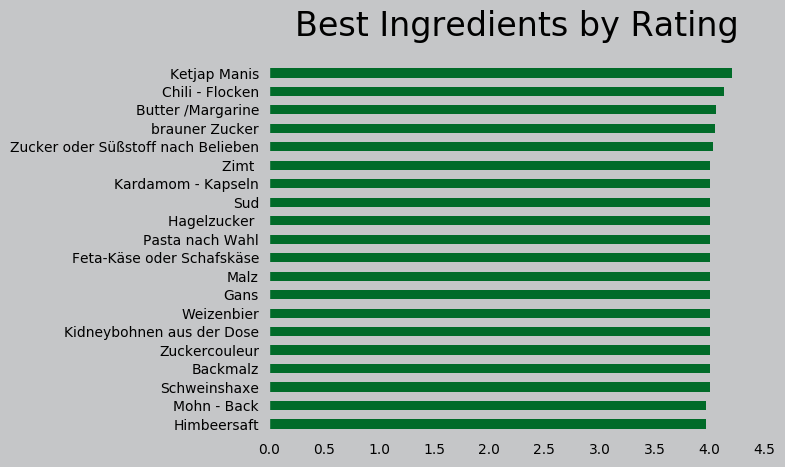

In [167]:
ax = df_zut.sort_values(by='avg', ascending = False).head(20).sort_values(by='avg').plot(kind='barh', color = "#016B29", y='avg', x='name', legend = False)
ax.tick_params(which='both', left=False, bottom=False)
ax.yaxis.label.set_visible(False)
ax.set_title ("Best Ingredients by Rating", pad=20,fontsize=24)
ax.set_xlim([0,4.5])


(0, 4.5)

/home/jls/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Futura'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


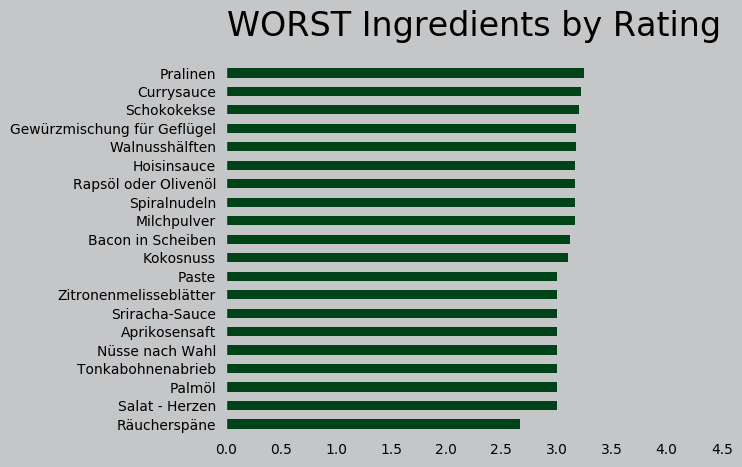

In [169]:
ax = df_zut.sort_values(by='avg').head(20).plot(kind='barh', color = "#004318", y='avg', x='name', legend = False)
ax.tick_params(which='both', left=False, bottom=False)
ax.yaxis.label.set_visible(False)
ax.set_title ("WORST Ingredients by Rating", pad=20,fontsize=24)
ax.set_xlim([0,4.5])


Text(0.5,1,'Most used ingredients')

/home/jls/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Futura'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


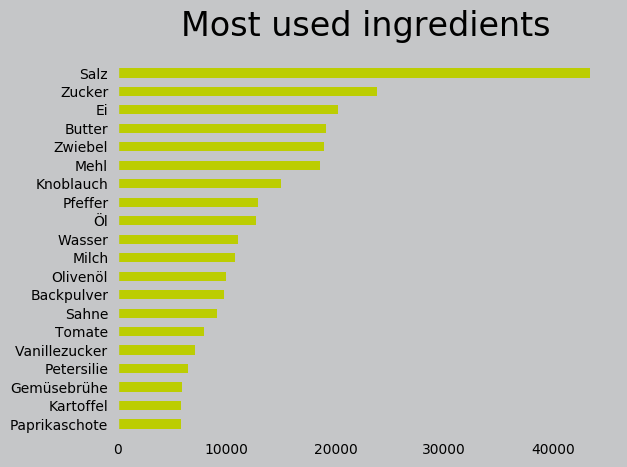

In [174]:
ax = df_zut.sort_values(by='count', ascending = False).head(20).sort_values(by='count').plot(kind='barh', color = "#BCCD02", y='count', x='name', legend = False)
ax.tick_params(which='both', left=False, bottom=False)
ax.yaxis.label.set_visible(False)
ax.set_title ("Most used ingredients", pad=20,fontsize=24)
#ax.set_xlim([0,4.5])

In [181]:
from wordcloud import WordCloud

In [219]:
def get_long_str(row):
    n = 1
    long_string = ''
    while n < row['count']/5:
        long_string = long_string +' '+ row['name']
        n += 1   
    return long_string

In [251]:
long_string = ' '.join(df_zut.sort_values(by='avg', ascending = False).head(20).apply(get_long_str, axis = 1))
long_string = re.sub(r'  ? ? ?', ' ', long_string)
long_string = re.sub(r'/', '', long_string)
long_string = long_string.strip()

In [252]:
long_string

'Ketjap Manis Chili - Flocken Butter Margarine Butter Margarine brauner Zucker brauner Zucker Zucker oder Süßstoff nach Belieben Zucker oder Süßstoff nach Belieben Zucker oder Süßstoff nach Belieben Kardamom - Kapseln Kardamom - Kapseln Kardamom - Kapseln Sud Sud Sud Sud Hagelzucker Hagelzucker Zimt Zimt Zimt Zimt Pasta nach Wahl Pasta nach Wahl Feta-Käse oder Schafskäse Feta-Käse oder Schafskäse Malz Malz Gans Gans Gans Gans Gans Weizenbier Kidneybohnen aus der Dose Kidneybohnen aus der Dose Zuckercouleur Zuckercouleur Backmalz Backmalz Backmalz Backmalz Backmalz Backmalz Backmalz Backmalz Backmalz Backmalz Backmalz Backmalz Backmalz Schweinshaxe Schweinshaxe Mohn - Back Mohn - Back Himbeersaft Himbeersaft'

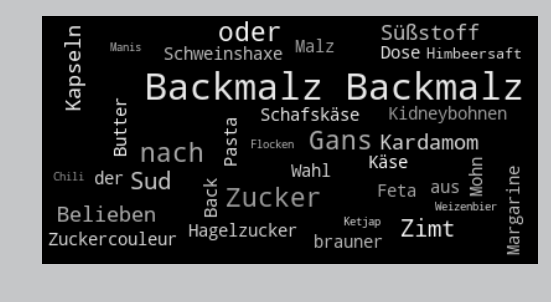

In [262]:
#long_string = 'Salz Salz Butter Butter Butter Butter Zucker Zucker Zucker Mehl'
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

wc = WordCloud(max_words=200, margin=10,
               random_state=1).generate(long_string)
# store default colored image
default_colors = wc.to_array()
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()